## Импорт библиотек и данных

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statsmodels.multivariate.factor import Factor

np.set_printoptions(precision=4, suppress=True, linewidth=120)

In [2]:
from pandas_datareader.data import DataReader
start = '1979-01-01'
end = '2024-01-01'
TOTBKCR = DataReader('TOTBKCR', 'fred', start=start, end=end)
DPSACBW027SBOG = DataReader('DPSACBW027SBOG', 'fred', start=start, end=end)
RELACBW027SBOG = DataReader('RELACBW027SBOG', 'fred', start=start, end=end)

## Визуализация тенденций банковских продуктов

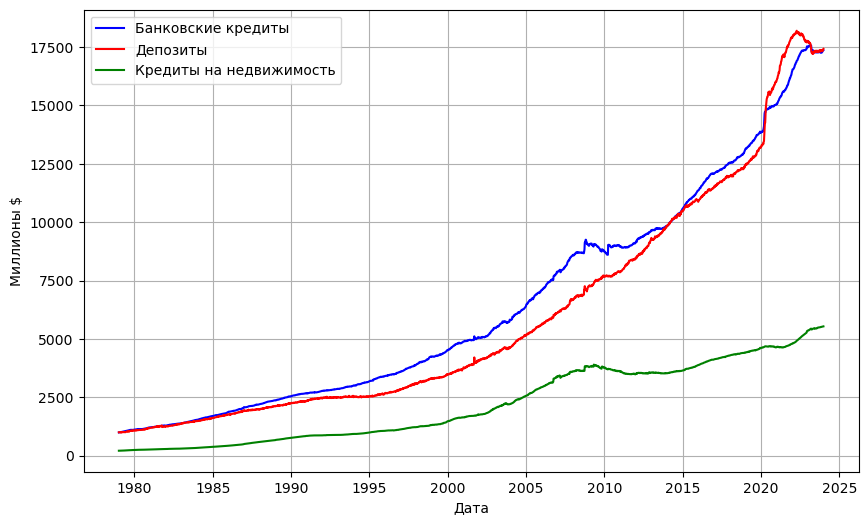

In [3]:
x = TOTBKCR.index
y1 = TOTBKCR['TOTBKCR'].to_numpy()
y2 = DPSACBW027SBOG['DPSACBW027SBOG'].to_numpy()
y3 = RELACBW027SBOG['RELACBW027SBOG'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Банковские кредиты', color='blue')
plt.plot(x, y2, label='Депозиты', color='red')
plt.plot(x, y3, label='Кредиты на недвижимость', color='green')
plt.xlabel('Дата')
plt.ylabel('Миллионы $')
plt.grid()
plt.legend()
plt.show()

## Импорт предполагаемых макроэкономических переменных

In [4]:
start = '1979-01-01'
end = '2023-12-01'
array, names = [], []

1. Эффективная ставка по федеральным фондам

In [5]:
FEDFUNDS = DataReader('FEDFUNDS', 'fred', start=start, end=end)
array.append(FEDFUNDS)
names.append('FEDFUNDS')

2. Денежная база

In [6]:
BOGMBASE = DataReader('BOGMBASE', 'fred', start=start, end=end)
array.append(BOGMBASE)
names.append('BOGMBASE')

3. Реальный располагаемый личный доход

In [7]:
DSPIC96 = DataReader('DSPIC96', 'fred', start=start, end=end)
array.append(DSPIC96)
names.append('DSPIC96')

4. Валовой внутренний продукт

In [8]:
GDP = DataReader('GDP', 'fred', start=start, end=end)
array.append(GDP)
names.append('GDP')

5. Уровень безработицы

In [9]:
UNRATE = DataReader('UNRATE', 'fred', start=start, end=end)
array.append(UNRATE)
names.append('UNRATE')

6. Спотовая цена на сырую нефть

In [10]:
WTISPLC = DataReader('WTISPLC', 'fred', start=start, end=end)
array.append(WTISPLC)
names.append('WTISPLC')

7. Cредняя стоимость аренды основного жилья

In [11]:
CUSR0000SEHA = DataReader('CUSR0000SEHA', 'fred', start=start, end=end)
array.append(CUSR0000SEHA)
names.append('CUSR0000SEHA')

8. Индекс цен на коммерческую недвижимость

In [12]:
BOGZ1FL075035503Q = DataReader('BOGZ1FL075035503Q', 'fred', start=start, end=end)
array.append(BOGZ1FL075035503Q)
names.append('BOGZ1FL075035503Q')

9. Прибыль на единицу продукции для сотрудников

In [13]:
PRS88003191 = DataReader('PRS88003191', 'fred', start=start, end=end)
array.append(PRS88003191)
names.append('PRS88003191')

10. Коэффициент вакантных площадей в США

In [14]:
RRVRUSQ156N = DataReader('RRVRUSQ156N', 'fred', start=start, end=end)
array.append(RRVRUSQ156N)
names.append('RRVRUSQ156N')

11. Корпоративная прибыль до налогообложения

In [15]:
A053RC1Q027SBEA = DataReader('A053RC1Q027SBEA', 'fred', start=start, end=end)
array.append(A053RC1Q027SBEA)
names.append('A053RC1Q027SBEA')

12. Совпадающий индекс экономической активности

In [16]:
USPHCI = DataReader('USPHCI', 'fred', start=start, end=end)
array.append(USPHCI)
names.append('USPHCI')

13. Средняя цена продажи домов

In [17]:
MSPUS = DataReader('MSPUS', 'fred', start=start, end=end)
array.append(MSPUS)
names.append('MSPUS')

14. Рыночная доходность казначейских ценных бумаг США

In [18]:
DGS5 = DataReader('DGS5', 'fred', start=start, end=end)
DGS5 = DGS5.resample('M').mean()
DGS5.index = DGS5.index.to_period('M').to_timestamp()
array.append(DGS5)
names.append('DGS5')

## Общие функции для облегчения поиска корреляции

In [19]:
# Функция, агрегирующая временные ряды по месяцам или кварталам соответственно
def aggregation(variable, target):
    targetm = target.resample('M').mean()
    targetm.index = targetm.index.to_period('M').to_timestamp()
    targetq = target.resample('Q').mean()
    targetq.index = targetq.index.to_period('Q').to_timestamp()
    if len(variable) == len(targetm):
        return targetm
    else:
        return targetq

In [20]:
# Функция, которая ищет все корреляции и создаёт df с сильными связями
def all_correlation(array, target):
    answer, variables, correlation = [], [], []
    for i in range(len(array)):
        helper = aggregation(array[i], target)
        spearman_corr = helper.corr(array[i][names[i]], method='spearman')
        if abs(spearman_corr) > 0.7:
            answer.append([abs(spearman_corr), spearman_corr, names[i]])
    answer.sort(reverse=True)
    for i in range(len(answer)):
        variables.append(answer[i][2])
        correlation.append(round(answer[i][1], 4))
    df = pd.DataFrame({
    'Variable': variables,
    'Correlation': correlation})
    return df

## Поиск корреляций Спирмена для TOTBKCR

In [21]:
all_correlation(array, TOTBKCR['TOTBKCR'])

,Variable,Correlation
0,CUSR0000SEHA,0.9995
1,GDP,0.9989
2,DSPIC96,0.9986
3,USPHCI,0.9972
4,BOGMBASE,0.9935
5,MSPUS,0.9905
6,A053RC1Q027SBEA,0.9798
7,BOGZ1FL075035503Q,0.9375
8,DGS5,-0.9173
9,FEDFUNDS,-0.8471


## Поиск корреляций Спирмена для DPSACBW027SBOG

In [22]:
all_correlation(array, DPSACBW027SBOG['DPSACBW027SBOG'])

,Variable,Correlation
0,CUSR0000SEHA,0.9996
1,GDP,0.9993
2,DSPIC96,0.9986
3,USPHCI,0.9971
4,BOGMBASE,0.9942
5,MSPUS,0.9907
6,A053RC1Q027SBEA,0.9808
7,BOGZ1FL075035503Q,0.9363
8,DGS5,-0.9193
9,FEDFUNDS,-0.8513


## Поиск корреляций Спирмена для RELACBW027SBOG

In [23]:
all_correlation(array, RELACBW027SBOG['RELACBW027SBOG'])

,Variable,Correlation
0,DSPIC96,0.9918
1,GDP,0.9916
2,CUSR0000SEHA,0.9916
3,USPHCI,0.9889
4,BOGMBASE,0.9838
5,MSPUS,0.9806
6,A053RC1Q027SBEA,0.9662
7,BOGZ1FL075035503Q,0.9346
8,DGS5,-0.9048
9,FEDFUNDS,-0.8350


## Склейка переменных с сильными корреляциями в один df

In [24]:
# На данном этапе мы можем сделать агрегацию ежемесячных временных рядов по кварталам, чтобы привести их к единому формату
def standartize(df):
    df = df.resample('M').mean()
    df.index = df.index.to_period('M').to_timestamp()
    return df

In [25]:
dta = pd.concat((standartize(DSPIC96), GDP, standartize(CUSR0000SEHA), standartize(USPHCI), standartize(BOGMBASE), MSPUS, 
                 A053RC1Q027SBEA, BOGZ1FL075035503Q, standartize(DGS5), standartize(FEDFUNDS)), axis=1)
dta.columns = ['Личный доход', 'ВВП', 'Средняя стоимость аренды', 'Индекс экономической активности', 'Денежная база', 'Средняя цена продажи домов', 
               'Прибыль корпораций', 'Индекс цен на коммерческую недвижимость', 'Рыночная доходность казначейских бумаг', 'Эффективная ставка по федеральным фондам']
dta.index.freq = dta.index.inferred_freq

## Факторный анализ методом главных компонент

In [26]:
fa = Factor(dta, n_factor=1, method='pa')
res = fa.fit()
res.get_loadings_frame(threshold=0.7)

,factor 0
Средняя стоимость аренды,-0.999968
ВВП,-0.997606
Личный доход,-0.995691
Индекс экономической активности,-0.992764
Средняя цена продажи домов,-0.988978
Прибыль корпораций,-0.969214
Индекс цен на коммерческую недвижимость,-0.945770
Денежная база,-0.907061
Рыночная доходность казначейских бумаг,0.836888
Эффективная ставка по федеральным фондам,0.742272


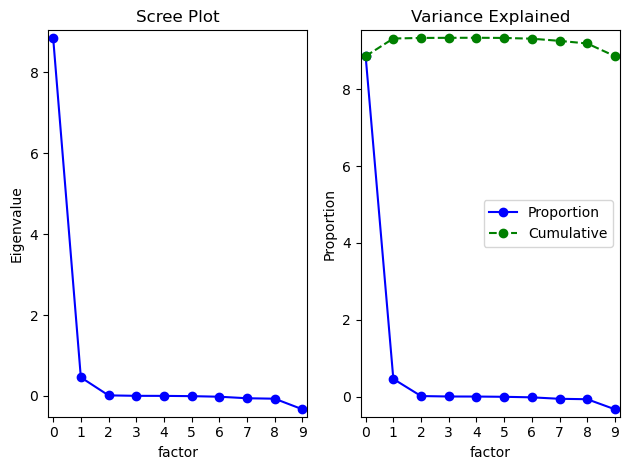

In [27]:
res.plot_scree()
plt.show()

## Факторный анализ методом максимального правдоподобия

In [28]:
fa = Factor(dta, n_factor=1, method='ml')
res = fa.fit()
res.get_loadings_frame(threshold=0.7)

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\multivariate\factor.py:419: UserWarning: Fitting did not converge
  warnings.warn("Fitting did not converge")


,factor 0
ВВП,0.979652
Средняя стоимость аренды,0.977682
Средняя цена продажи домов,0.969699
Индекс экономической активности,0.969666
Личный доход,0.968897
Индекс цен на коммерческую недвижимость,0.957296
Прибыль корпораций,0.950496
Денежная база,0.912321
Рыночная доходность казначейских бумаг,-0.769302
Эффективная ставка по федеральным фондам,-0.642531
